# *Explanatory Data Analysis*

## ***Risk Factors of Heart Disease***

https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronary-heart-disease

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import plotnine as p9
plt.rcParams['axes.facecolor'] = 'white'
sns.set(rc = {'figure.figsize':(14,10)})
sns.set_style("white")
plt.rcParams["figure.figsize"] = (14,10)

In [ ]:
def percentage_plot(var1, var2, arr, white):
  plt.figure(figsize=(14,10))
  cross_tab_prop = pd.crosstab(index=df[var1],
                              columns=df[var2],
                              normalize="index")
  ax = cross_tab_prop.plot(kind='bar', 
                      stacked=True, 
                      figsize=(14, 10),
                      orientation=u'vertical',
                      color = ['#BE514F', '#5082BA'],
                      )
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  plt.legend(loc="upper left", ncol=2)
  plt.xlabel(var1)
  plt.ylabel("Percentage")
  plt.xticks(rotation=360)
  ax.legend(loc='upper left', ncol = 2, bbox_to_anchor=(-0.011, 1.03), prop={'size': 13})
  ax.set_title(f'{var1} and {var2}\n', size = 24, loc = 'left', fontname="Arial")
  ax.tick_params(axis='x', labelsize=18)
  ax.set(xlabel=None)
  
  cross_tab = pd.crosstab(index=df[var1],
                          columns=df[var2])
  
  for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
        if(np.round(proportion * 100, 1) in arr):        
          plt.text(x=n - 0.17,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{white}{np.round(proportion * 100, 1)}%', 
                  color="black",
                  fontsize=16,
                  fontweight="bold")
        
  plt.show()
  plt.savefig(fname = f'{var1}{var2}', dpi = 300)

In [ ]:
df = pd.read_csv("/content/Heart Diseases Clean Grouped Last.csv")

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholestrol',
       'Fasting Blood Pressure > 120mg/dl', 'Rest ECG', 'Maximum Heart Rate',
       'Exercise Induced Angina', 'Exercise Induced ST Depression', 'Slope',
       'Number of Major Vessels', 'Thalassemia', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Age,Resting Blood Pressure,Cholestrol,Maximum Heart Rate,Exercise Induced ST Depression,Number of Major Vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.663366
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.934375
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [ ]:
from scipy. stats import skew, kurtosis
def calc(col):
  print(skew(col, bias=False))
  print(kurtosis(col, bias=False))

calc(df['Resting Blood Pressure'])
calc(df['Maximum Heart Rate'])
calc(df['Age'])
calc(df['Cholestrol'])
calc(df['Exercise Induced ST Depression'])

0.7060346498131783
0.8800738685514471
-0.5374486699106464
-0.05354095894691646
-0.2090604688201288
-0.5233827452226572
1.1355031533363458
4.4917242865388545
1.2697199306019966
1.5758130733382512


##Data visuals included in the analytical part (important figures or central ideas that need specific visualisations can be included as necessary) 


In [ ]:
df[df.Outcome == 'Heart Disease'].Sex.value_counts()

Male      114
Female     25
Name: Sex, dtype: int64

In [ ]:
df.Sex.value_counts()

Male      206
Female     97
Name: Sex, dtype: int64

### Sex and Outcome

<Figure size 1008x720 with 0 Axes>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


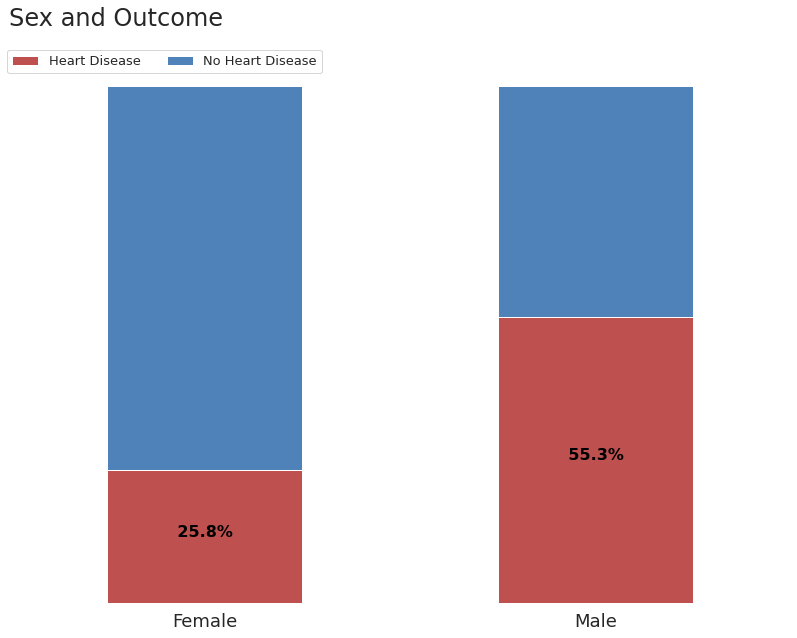

<Figure size 1008x720 with 0 Axes>

In [ ]:
percentage_plot('Sex', 'Outcome', [25.8, 55.3], '       ')

55.3% of males have CHD, while 25.8% of females have CHD.

According to [https://www.ahajournals.org/doi/full/10.1161/01.CIR.99.9.1165]
There is a big difference in the risk of coronary heart disease between sexes, for example in middle aged people CHD is 2 to 5 times more common in men compared to women, however the risk increase in both sexes with age. 

Hence, in our data we will consider the imbalance of the sexes as a result of this disparity in CHD risk. 

Accordingly in our dataset males were twice as likely to have CHD compared to women.



### Heart Disease, Gender, Thalassemia


<Figure size 1008x720 with 0 Axes>

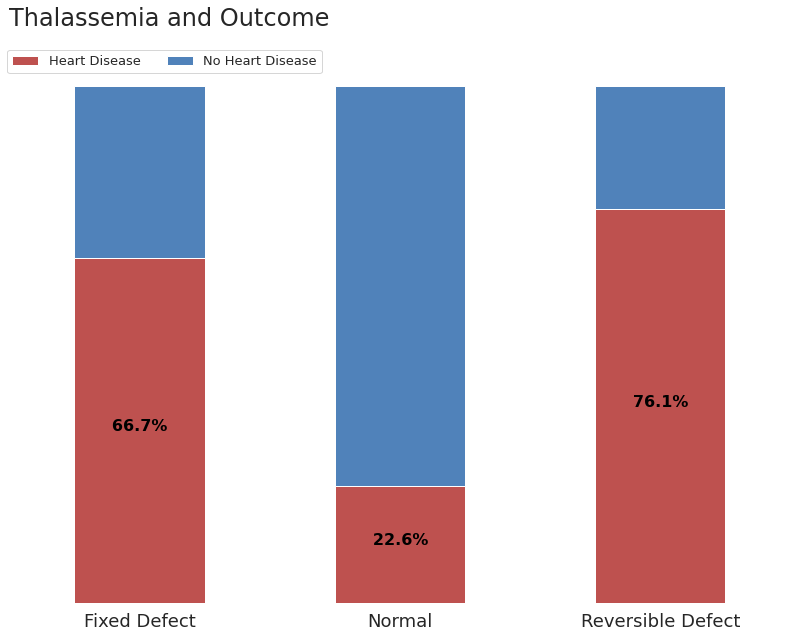

<Figure size 1008x720 with 0 Axes>

In [ ]:
percentage_plot("Thalassemia", "Outcome", [66.7, 22.6, 76.1], '   ')

76% of patients with reversible defect thalassemia have CHD, and 66.7% of patients with fixed defect thalassemia have CHD, while 22.6% of patients with normal thalassemia have CHD.

|  Thalassemia Type |                  Description                 |   |   |   |
|:-----------------:|:--------------------------------------------:|---|---|---|
| Fixed Defect      | No blood flow in some part of the heart.     |   |   |   |
| Normal            | Normal blood flow is observed.               |   |   |   |
| Reversible Defect | Blood flow is observed but it is not normal. |   |   |   |

According to table 1, patients with reversible defect and fixed defect thalassemia face irregularities in blood flow to the heart. Therefore, increasing the chances of being diagnosed with CHD (Deshmukh, 2022). 


### Chest Pain Type and Outcome

<Figure size 1008x720 with 0 Axes>

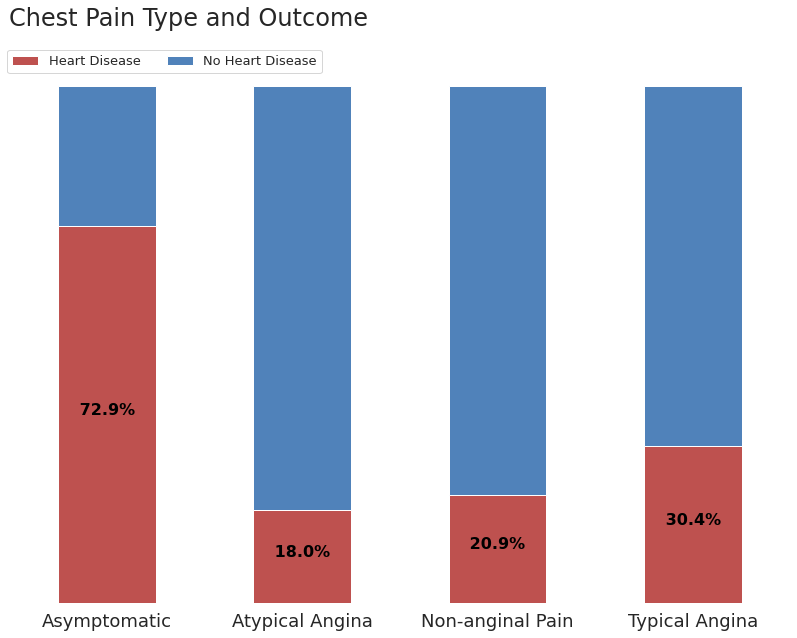

<Figure size 1008x720 with 0 Axes>

In [ ]:
percentage_plot('Chest Pain Type', 'Outcome', [72.9, 18.0, 20.9, 30.4], ' ')

72.9% of patients with asymptomatic chest pain have CHD. Most of the patients with asymptomatic chest pain have CHD.

Patients with asymptomatic chest pain face the risk of getting a silent heart attack, the silent heart attack involves blockage of blood flow to the heart and possible damage to the heart muscle. Silent heart attacks can put the patient at risk of facing another deadly heart attack. (Mankad, 2022) 

### Slope and Outcome

<Figure size 1008x720 with 0 Axes>

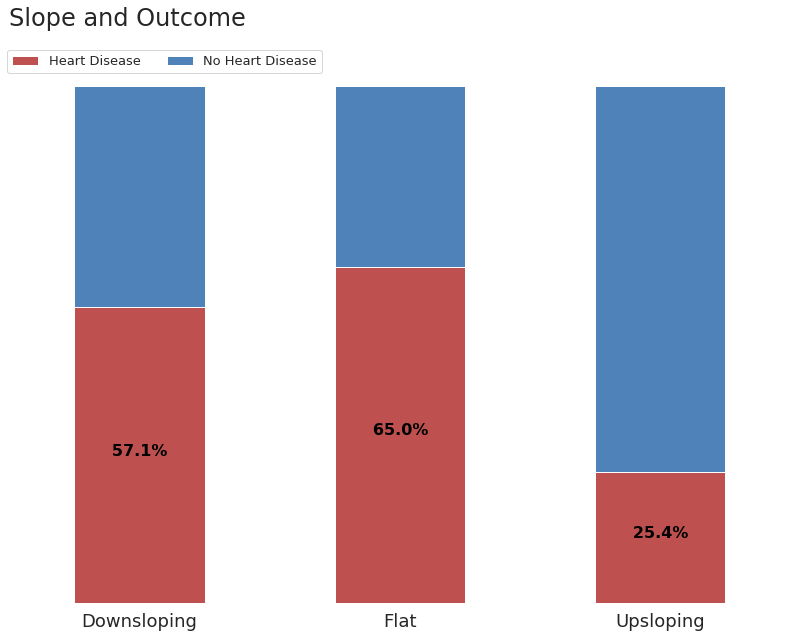

<Figure size 1008x720 with 0 Axes>

In [ ]:
percentage_plot('Slope', 'Outcome', [57.1, 65.0, 25.4], '   ')

65% of patients with flat exercise induced ST depression have CHD.

Equivocal standard ECG response includes upsloping ST-segment depression which is an inconclusive result, and extra testing might be needed to find any problems with the heart muscle and the shortage of blood supply to the heart.

Positive ECG including flat and downsloping shows possible angina, which is the shortage of blood supply to the heart, and it can be an indicator of heart disease.

[https://www.aafp.org/afp/2017/0901/afp20170901p293.pdf]


### Number of Major Vessels and Outcome

<Figure size 1008x720 with 0 Axes>

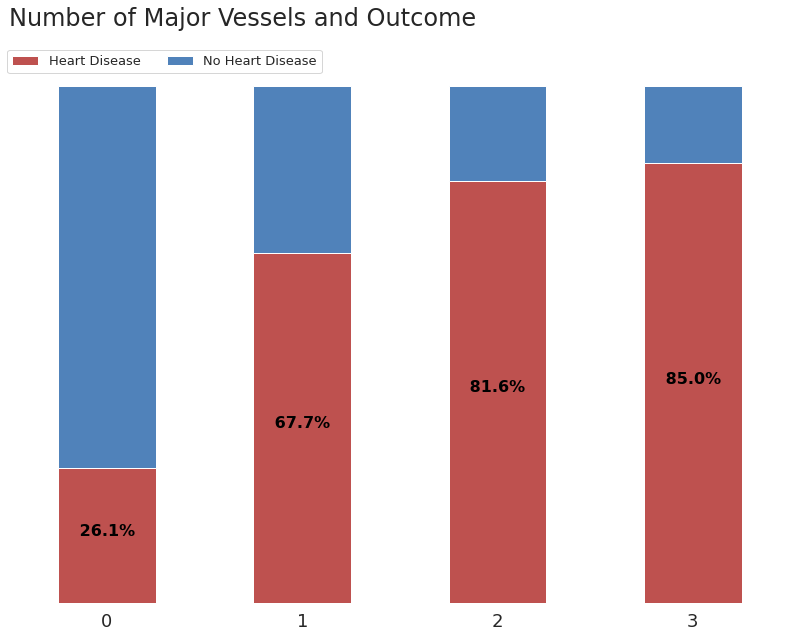

<Figure size 1008x720 with 0 Axes>

In [ ]:
percentage_plot('Number of Major Vessels', 'Outcome', [26.1, 67.7,81.6,85.0], ' ')

* As the number of major vessels increases, the percentage of patients with heart disease increases. 
* 85% of patients with three major vessels not colored by flourospy have CHD. 

As the number of blocked major vessels increases, the patient faces irregularities with blood flow to the heart rate. Thus, increasing the risk of CHD.

### Exercise Induced Angina and Outcome

<Figure size 1008x720 with 0 Axes>

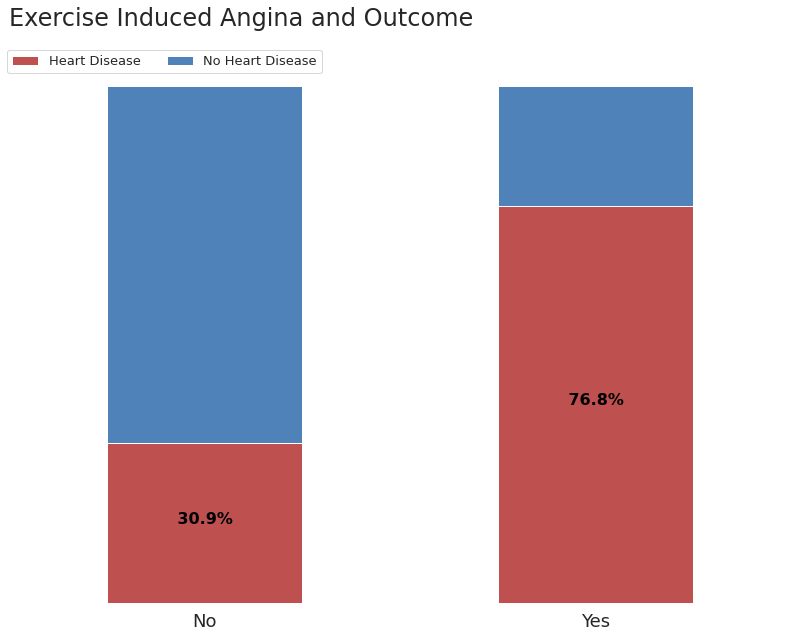

<Figure size 1008x720 with 0 Axes>

In [ ]:
percentage_plot('Exercise Induced Angina', 'Outcome', [30.9, 76.8], '       ')

76.8% of patients with exercise induced angina have CHD.

Exercice causes the heart to demand more blood, if the blood can't flow to the heart due to blockage in artries this causes an unstable angina, which could be a sign of heart disease. 

[https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373#:~:text=But%20when%20you%20increase%20the,arteries%20slow%20down%20blood%20flow.]

###Age, Maximum Heart Rate, and Outcome

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


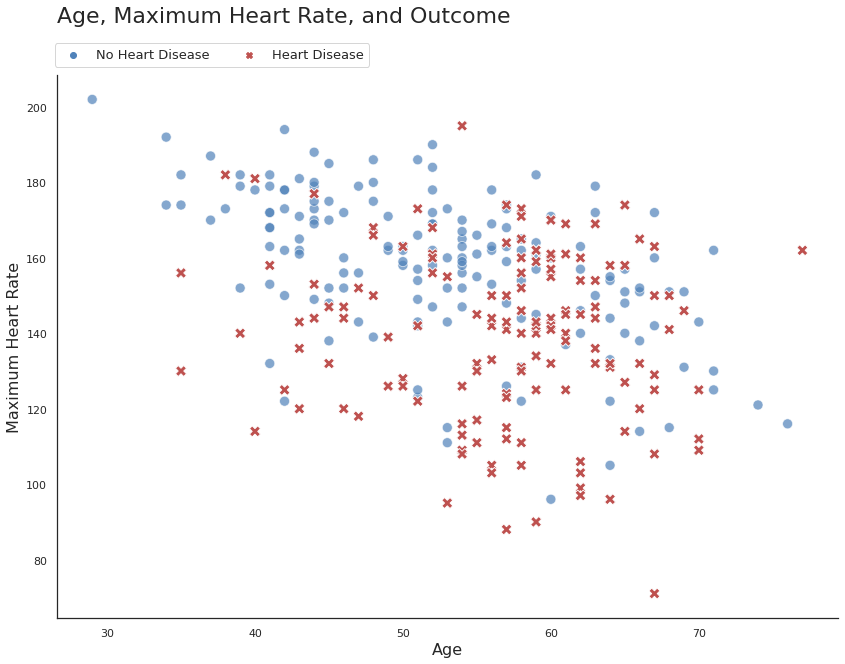

In [ ]:
df["alpha"] = np.where(df.Outcome == "Heart Disease", 1.0, 0.7)

plot = sns.scatterplot(x="Age", y="Maximum Heart Rate", data=df[df.alpha == 0.7], alpha=0.7, hue = 'Outcome', s = 100, style = 'Outcome', markers = ['o'], palette = ['#5082BA'])
sns.scatterplot(x="Age", y="Maximum Heart Rate", data=df[df.alpha == 1.0], alpha=1.0, ax=plot, hue = 'Outcome', s = 120, style = 'Outcome', markers = ['X'], palette = ['#BE514F'])
plot.set_title('Age, Maximum Heart Rate, and Outcome\n\n', size = 22, loc = 'left', fontname="Arial")
plt.xlabel('Age', size = 16)
sns.set_style("ticks")
plt.ylabel('Maximum Heart Rate', size = 16)
plot.legend(loc='upper left', ncol = 2, bbox_to_anchor=(-0.011, 1.07), prop={'size': 13})
plot.set_xticks(range(30,80,10))
sns.despine(right = True, top = True)

The distribution of heart disease patients falls mostly within older patients and lower maximum heart rate.


### Sex, Mean Age, and Heart Disease

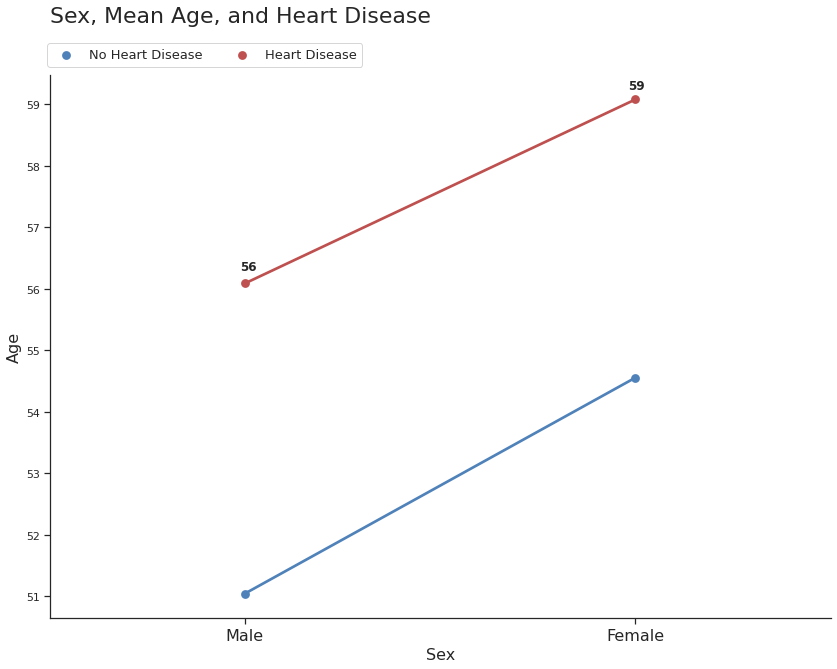

In [ ]:
plot2 = sns.pointplot(x = 'Sex', y = 'Age', data = df, hue = 'Outcome', palette = ['#5082BA','#BE514F'], ci = None)
plot2.set_title('Sex, Mean Age, and Heart Disease\n\n', size = 22, loc = 'left', fontname="Arial")
plot2.tick_params(axis='x', labelsize=16)
plt.xlabel('Sex', size = 16)
plt.ylabel('Age', size = 16)
plot2.legend(loc='upper left', ncol = 2, bbox_to_anchor=(-0.011, 1.07), prop={'size': 13})
plt.text(-0.012,56.3,"56", weight = 'bold', size = 12)
plt.text(0.98,59.25,"59", weight = 'bold', size = 12)
plot.set_yticks(range(51,59,1))
sns.despine(right = True, top = True)

"Recent studies using the technique of 24-hour ambulatory blood pressure monitoring have shown that blood pressure is higher in men than in women at similar ages. After menopause, however, blood pressure increases in women to levels even higher than in men." (Mankad, 2022)

"In most populations, serum total cholesterol increases as age increases. In men, this increase usually levels off around the age of 45 to 50 years, whereas in women, the increase continues sharply until the age of 60 to 65 years." (Jousilahti, 2022)

Since females usually have higher blood pressure and total cholesterol, they are diagnosed with CHD at later ages. Hence, the mean age for male patients with CHD is 56, as opposed to 59 with female patients.

### Exercise Induced Angina and Chest Pain Type

In [ ]:
df_chd = df[df['Outcome'] == "Heart Disease"]

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


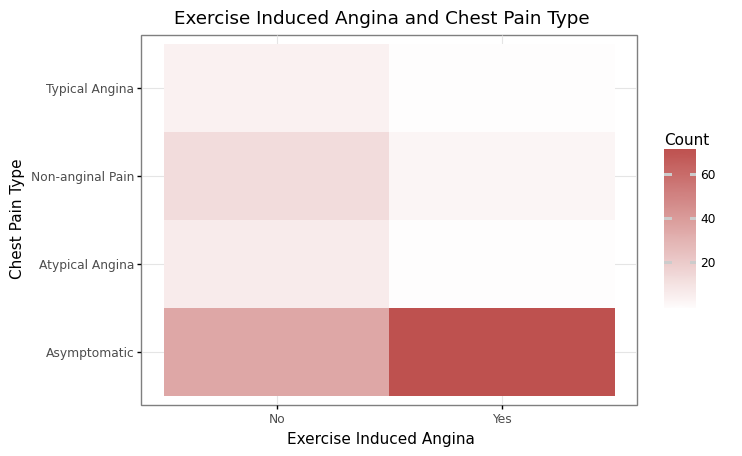

<ggplot: (8776838076437)>


,Exercise Induced Angina,Chest Pain Type,Count,Percentage
0,No,Asymptomatic,35,25.179856
1,No,Atypical Angina,8,5.755396
2,No,Non-anginal Pain,14,10.071942
3,No,Typical Angina,6,4.316547
4,Yes,Asymptomatic,70,50.359712
5,Yes,Atypical Angina,1,0.719424
6,Yes,Non-anginal Pain,4,2.877698
7,Yes,Typical Angina,1,0.719424


In [ ]:
count_df_1 = df_chd[['Exercise Induced Angina', 'Chest Pain Type', 'Age']].groupby(by=['Exercise Induced Angina','Chest Pain Type'], as_index=False).count()
count_df_1.rename(columns={'Age': 'Count'}, inplace = True)
x = (p9.ggplot(count_df_1, p9.aes(x='Exercise Induced Angina', y='Chest Pain Type')) +
p9.geom_tile(p9.aes(fill='Count')) +
#p9.xlim(scale_count) +
p9.scale_fill_gradient2(low="white", high="#BE514F")+p9.theme_bw() + p9.ggtitle("Exercise Induced Angina and Chest Pain Type"))

print(x)
count_df_1['Percentage'] = (count_df_1['Count']/len(df_chd))*100
count_df_1

50.4% of heart disease patients have exercise induced angina and asymptomatic chest pain.

### Exercise Induced Angina and Thalassemia

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


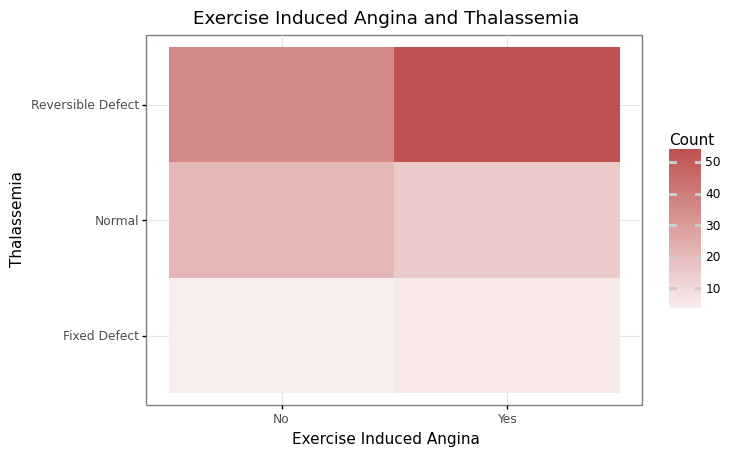

<ggplot: (8776838010557)>


,Exercise Induced Angina,Thalassemia,Count,Percentage
0,No,Fixed Defect,5,3.597122
1,No,Normal,22,15.827338
2,No,Reversible Defect,36,25.899281
3,Yes,Fixed Defect,7,5.035971
4,Yes,Normal,16,11.510791
5,Yes,Reversible Defect,53,38.129496


In [ ]:
count_df_1 = df_chd[['Exercise Induced Angina', 'Thalassemia', 'Age']].groupby(by=['Exercise Induced Angina','Thalassemia'], as_index=False).count()
count_df_1.rename(columns={'Age': 'Count'}, inplace = True)
x = (p9.ggplot(count_df_1, p9.aes(x='Exercise Induced Angina', y='Thalassemia')) +
p9.geom_tile(p9.aes(fill='Count')) +
#p9.xlim(scale_count) +
p9.scale_fill_gradient2(low="white", high="#BE514F")+p9.theme_bw() + p9.ggtitle("Exercise Induced Angina and Thalassemia"))
print(x)
count_df_1['Percentage'] = (count_df_1['Count']/len(df_chd))*100
count_df_1

38.1% of heart disease patients have exercise induced angina and reversible defect thalassemia, since reversible defect thalassemia usually shows irregularity in the blood flow supply to the heart; Which is the reason behind exercise induced angina, due to blockage of the heart. (Deshmukh, 2022)

###Thalassemia and Number of Major Vessels

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


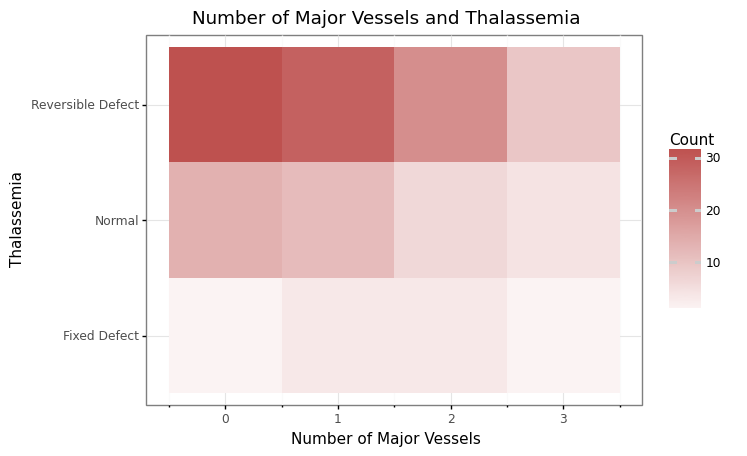

<ggplot: (8776829073901)>


,Number of Major Vessels,Thalassemia,Count,Percentage
0,0,Fixed Defect,2,1.438849
1,0,Normal,14,10.071942
2,0,Reversible Defect,31,22.302158
3,1,Fixed Defect,4,2.877698
4,1,Normal,12,8.633094
5,1,Reversible Defect,28,20.143885
6,2,Fixed Defect,4,2.877698
7,2,Normal,7,5.035971
8,2,Reversible Defect,20,14.388489
9,3,Fixed Defect,2,1.438849


In [ ]:
count_df_1 = df_chd[['Number of Major Vessels', 'Thalassemia', 'Age']].groupby(by=['Number of Major Vessels','Thalassemia'], as_index=False).count()
count_df_1.rename(columns={'Age': 'Count'}, inplace = True)
x = (p9.ggplot(count_df_1, p9.aes(x='Number of Major Vessels', y='Thalassemia')) +
p9.geom_tile(p9.aes(fill='Count')) +
#p9.xlim(scale_count) +
p9.scale_fill_gradient2(low="white", high="#BE514F")+p9.theme_bw() + p9.ggtitle("Number of Major Vessels and Thalassemia"))
print(x)
count_df_1['Percentage'] = (count_df_1['Count']/len(df_chd))*100
count_df_1

### Thalassemia and Chest Pain Type

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


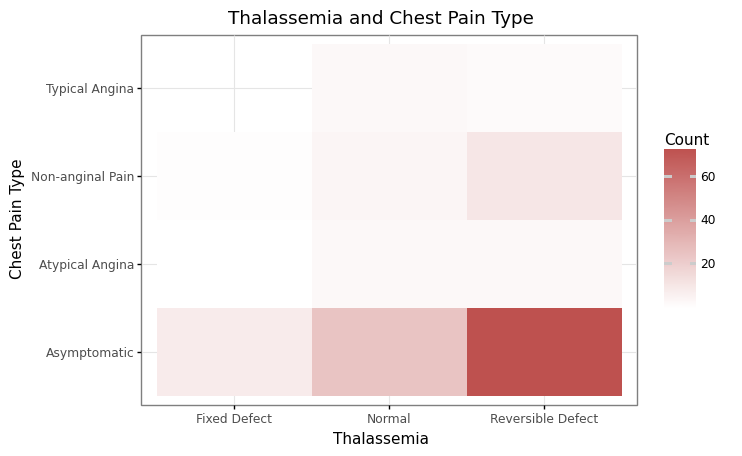

<ggplot: (8776829078293)>


,Thalassemia,Chest Pain Type,Count,Percentage
0,Fixed Defect,Asymptomatic,9,6.474820
1,Fixed Defect,Atypical Angina,1,0.719424
2,Fixed Defect,Non-anginal Pain,2,1.438849
3,Normal,Asymptomatic,25,17.985612
4,Normal,Atypical Angina,4,2.877698
5,Normal,Non-anginal Pain,5,3.597122
6,Normal,Typical Angina,4,2.877698
7,Reversible Defect,Asymptomatic,71,51.079137
8,Reversible Defect,Atypical Angina,4,2.877698
9,Reversible Defect,Non-anginal Pain,11,7.913669


In [ ]:
count_df_2 = df_chd[['Thalassemia', 'Chest Pain Type', 'Age']].groupby(by=['Thalassemia','Chest Pain Type'], as_index=False).count()
count_df_2.rename(columns={'Age': 'Count'}, inplace = True)
x = (p9.ggplot(count_df_2, p9.aes(x='Thalassemia', y='Chest Pain Type')) +
p9.geom_tile(p9.aes(fill='Count')) +
#p9.xlim(scale_count) +
p9.scale_fill_gradient(low="white", high="#BE514F")+p9.theme_bw()+p9.ggtitle('Thalassemia and Chest Pain Type'))
print(x)
count_df_2['Percentage'] = (count_df_2['Count']/len(df_chd))*100
count_df_2

patients with thalassemia experience chest pains of different types, however, the vast majority of patients with thalassemia don't experience chest pains, in other words, they are asymptomatic 


51.1% of heart disease patients have reversible defect thalassemia and asymptomatic chest pain.

In [ ]:
df.describe().to_csv('describe.csv')

##References

Deshmukh, H., 2020. Heart Disease UCI Diagnosis & Prediction. [online] Medium. Available at: <https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7> [Accessed 12 January 2022].

Mankad, R., 2020. Silent heart attack: What are the risks?. [online] Mayo Clinic. Available at: <https://www.mayoclinic.org/diseases-conditions/heart-attack/expert-answers/silent-heart-attack/faq-20057777> [Accessed 12 January 2022].

Jousilahti, P., 1999. Sex, Age, Cardiovascular Risk Factors, and Coronary Heart Disease. [online] Circulation. Available at: <https://www.ahajournals.org/doi/full/10.1161/01.CIR.99.9.1165> [Accessed 12 January 2022].

Reckelhoff, J., 2001. Gender Differences in the Regulation of Blood Pressure. [online] Hypertension. Available at: <https://www.ahajournals.org/doi/full/10.1161/01.HYP.37.5.1199> [Accessed 12 January 2022].